# Using the rs_drift on observation data
### Notebook for demonstration.

Ulrich Voggenberger, MSc BSc <br>
2024.02.13 <br>
ulrich.voggenberger@univie.ac.at <br>


In [1]:
# ! pip install rs-drift 

In [2]:
import rs_drift as rsd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading some test data:

In [3]:
df = rsd.drift.load_test_data()

In [4]:
df

,datum,timePeriod,pressure,geopotentialHeight,latitudeDisplacement,longitudeDisplacement,airTemperature,windDirection,windSpeed,lat,lon,alt
0,20200531.0,230400.0,101670.0,13,-0.00006,-0.00020,295.26,28,2.7,34.78,-76.88,11.0
1,20200531.0,230400.0,101620.0,17,-0.00013,-0.00029,295.14,31,2.9,34.78,-76.88,11.0
2,20200531.0,230400.0,101560.0,22,-0.00018,-0.00035,295.05,35,3.2,34.78,-76.88,11.0
3,20200531.0,230400.0,101500.0,28,-0.00028,-0.00042,294.98,37,3.4,34.78,-76.88,11.0
4,20200531.0,230400.0,101430.0,33,-0.00037,-0.00052,294.91,38,3.6,34.78,-76.88,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3432,20200531.0,230400.0,10030.0,16449,-0.22181,0.96795,208.64,264,17.0,34.78,-76.88,11.0
3433,20200531.0,230400.0,10020.0,16454,-0.22179,0.96813,208.63,264,17.1,34.78,-76.88,11.0
3434,20200531.0,230400.0,10020.0,16459,-0.22176,0.96832,208.61,264,17.2,34.78,-76.88,11.0
3435,20200531.0,230400.0,10010.0,16464,-0.22173,0.96850,208.59,263,17.3,34.78,-76.88,11.0


### For the drift calculation, we need the wind components:

In [5]:
df['u'] = - np.abs(df.windSpeed) * np.sin(np.radians(df.windDirection))
df['v'] = - np.abs(df.windSpeed) * np.cos(np.radians(df.windDirection))

In [6]:
trajectory = rsd.drift.trajectory(df.lat[0], df.lon[0], np.array(df.u), np.array(df.v), np.array(df.pressure), np.array(df.airTemperature))

/home/uv/.local/lib/python3.10/site-packages/rs_drift/drift.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  a = (t[i-1]-t[i])/(p[i-1]**cnst_kap-p[i]**cnst_kap)
/home/uv/.local/lib/python3.10/site-packages/rs_drift/drift.py:73: RuntimeWarning: invalid value encountered in scalar add
  tm = a * pmk + b
/home/uv/.local/lib/python3.10/site-packages/rs_drift/drift.py:71: RuntimeWarning: invalid value encountered in scalar divide
  a = (t[i-1]-t[i])/(p[i-1]**cnst_kap-p[i]**cnst_kap)


### Writing the calculated data back into the dataframe:

In [7]:
df['calc_lat_displacement'] = trajectory[0]
df['calc_lon_displacement'] = trajectory[1]
df['calc_displacement_time'] = trajectory[2]

### A plot for quick comparison:

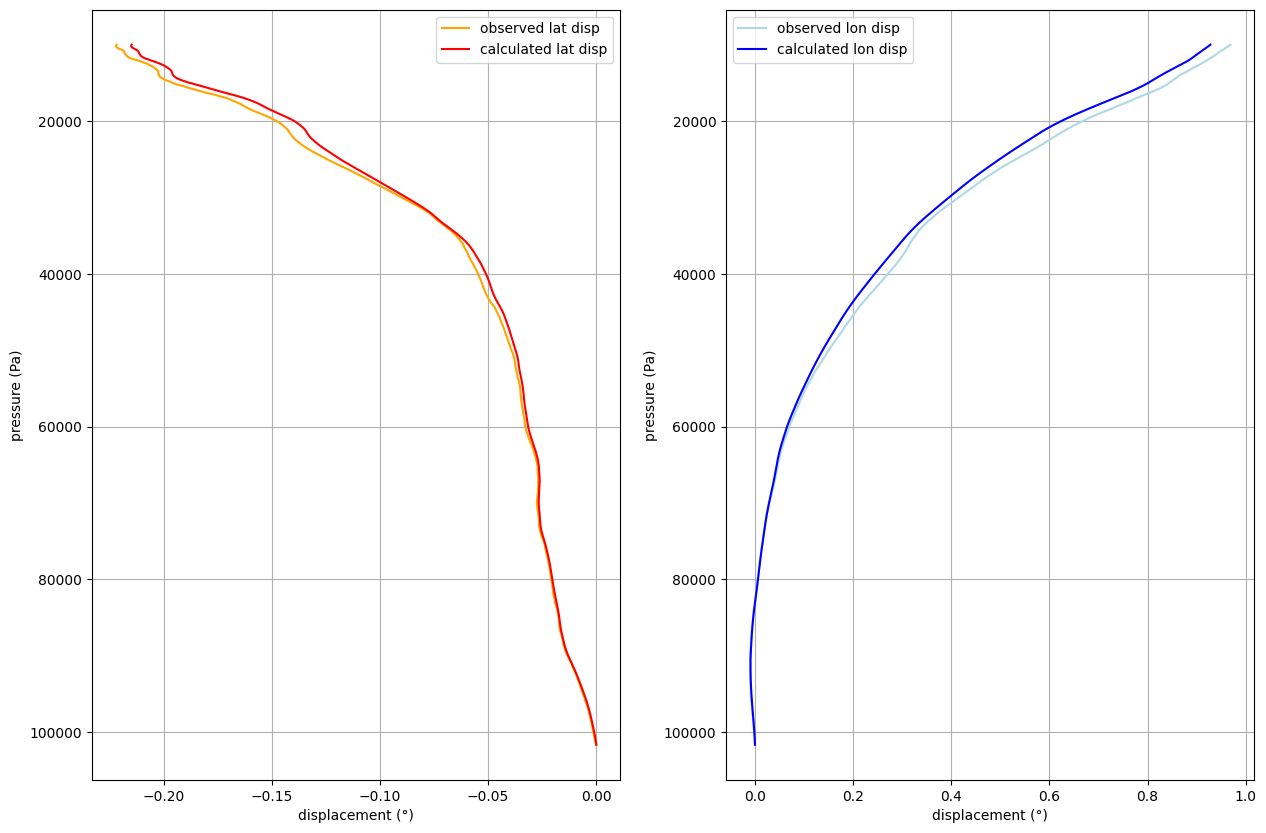

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (15,10))
ax[0].plot(np.array(df.latitudeDisplacement),df.pressure,color='orange', label='observed lat disp')
ax[0].plot(np.array(df.calc_lat_displacement),df.pressure, color='red', label='calculated lat disp')
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].set_ylabel('pressure (Pa)')
ax[0].set_xlabel('displacement (°)')
ax[0].grid()
ax[0].legend()

ax[1].plot(np.array(df.longitudeDisplacement),df.pressure,color='lightblue', label='observed lon disp')
ax[1].plot(np.array(df.calc_lon_displacement),df.pressure, color='blue', label='calculated lon disp')
ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[1].set_ylabel('pressure (Pa)')
ax[1].set_xlabel('displacement (°)')
ax[1].grid()
ax[1].legend()

plt.show()

### To simulate the 16 standard pressure level, which are often the only levels available, we choose a subset from the whole dataset:

In [9]:
# select 16 values from dataset - about equal distance
dist = int(len(df.pressure) / 16)
index = np.arange(0,16,1) * dist

df_reduced = df.iloc[index]

### We rerun the same procedure now with the reduced data:

In [10]:
df_reduced = df_reduced.reset_index()

In [11]:
trajectory_reduced = rsd.drift.trajectory(df_reduced.lat[0], df_reduced.lon[0], np.array(df_reduced.u), np.array(df_reduced.v), np.array(df_reduced.pressure), np.array(df_reduced.airTemperature))

In [12]:
df_reduced['reduced_calc_lat_displacement'] = trajectory_reduced[0]
df_reduced['reduced_calc_lon_displacement'] = trajectory_reduced[1]
df_reduced['reduced_calc_displacement_time'] = trajectory_reduced[2]

In [13]:
df_reduced

,index,datum,timePeriod,pressure,geopotentialHeight,latitudeDisplacement,longitudeDisplacement,airTemperature,windDirection,windSpeed,...,lon,alt,u,v,calc_lat_displacement,calc_lon_displacement,calc_displacement_time,reduced_calc_lat_displacement,reduced_calc_lon_displacement,reduced_calc_displacement_time
0,0,20200531.0,230400.0,101670.0,13,-0.00006,-0.00020,295.26,28,2.7,...,-76.88,11.0,-1.267573,-2.383959e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,214,20200531.0,230400.0,89700.0,1084,-0.01382,-0.00949,287.03,336,9.0,...,-76.88,11.0,3.660630,-8.221909e+00,-0.013422,-0.008633,213.000476,-0.010205,0.002791,213.485943
2,428,20200531.0,230400.0,79170.0,2130,-0.02125,0.00740,282.37,291,8.5,...,-76.88,11.0,7.935434,-3.046128e+00,-0.020764,0.007737,421.410566,-0.020775,0.015973,421.608245
3,642,20200531.0,230400.0,69860.0,3156,-0.02738,0.03003,276.19,270,12.8,...,-76.88,11.0,12.800000,2.351322e-15,-0.026613,0.029070,625.611878,-0.023586,0.039134,626.142079
4,856,20200531.0,230400.0,61890.0,4127,-0.03069,0.05998,272.52,286,17.6,...,-76.88,11.0,16.918206,-4.851217e+00,-0.029624,0.056068,819.661323,-0.027844,0.070709,820.698648
5,1070,20200531.0,230400.0,54390.0,5150,-0.03563,0.10887,266.06,276,23.8,...,-76.88,11.0,23.669621,-2.487777e+00,-0.034235,0.102758,1023.652506,-0.034588,0.115843,1024.337250
6,1284,20200531.0,230400.0,48380.0,6055,-0.04124,0.16777,261.83,278,27.5,...,-76.88,11.0,27.232372,-3.827260e+00,-0.039074,0.152672,1204.756992,-0.039748,0.166131,1205.266707
7,1498,20200531.0,230400.0,42720.0,6994,-0.05082,0.23379,254.66,279,31.9,...,-76.88,11.0,31.507258,-4.990259e+00,-0.047450,0.210638,1392.461817,-0.047238,0.226454,1393.355557
8,1712,20200531.0,230400.0,36980.0,8052,-0.06008,0.30730,245.76,283,31.2,...,-76.88,11.0,30.400346,-7.018473e+00,-0.056956,0.283138,1603.867778,-0.058697,0.297881,1604.688030
9,1926,20200531.0,230400.0,31270.0,9238,-0.08161,0.38784,238.98,290,40.1,...,-76.88,11.0,37.681674,-1.371501e+01,-0.080425,0.371393,1841.264927,-0.080966,0.386316,1842.646452


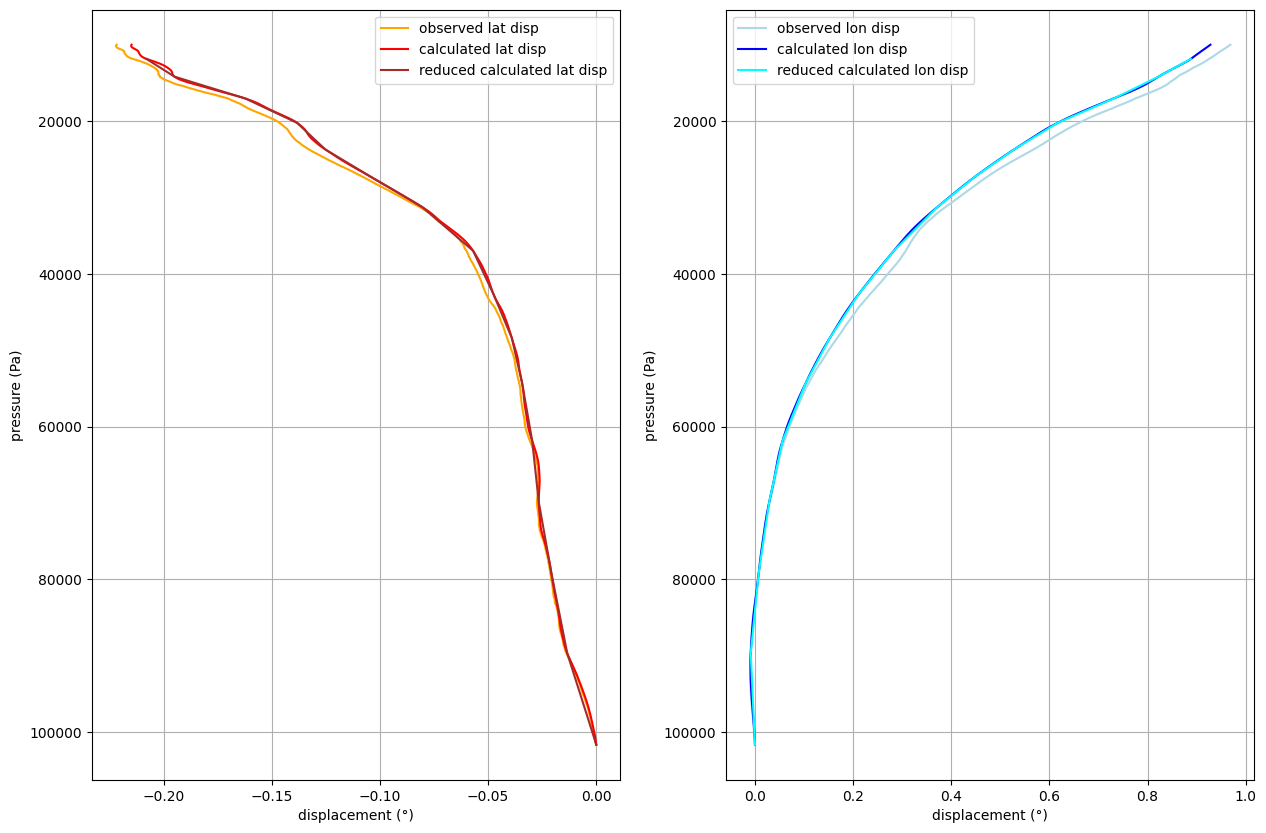

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15,10))
ax[0].plot(np.array(df.latitudeDisplacement),df.pressure,color='orange', label='observed lat disp')
ax[0].plot(np.array(df.calc_lat_displacement),df.pressure, color='red', label='calculated lat disp')
ax[0].plot(np.array(df_reduced.calc_lat_displacement),df_reduced.pressure, color='brown', label='reduced calculated lat disp')
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].set_ylabel('pressure (Pa)')
ax[0].set_xlabel('displacement (°)')
ax[0].grid()
ax[0].legend()

ax[1].plot(np.array(df.longitudeDisplacement),df.pressure,color='lightblue', label='observed lon disp')
ax[1].plot(np.array(df.calc_lon_displacement),df.pressure, color='blue', label='calculated lon disp')
ax[1].plot(np.array(df_reduced.calc_lon_displacement),df_reduced.pressure, color='cyan', label='reduced calculated lon disp')
ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[1].set_ylabel('pressure (Pa)')
ax[1].set_xlabel('displacement (°)')
ax[1].grid()
ax[1].legend()

plt.show()

### Comparison between calculated height information and observed height information:
If height information is available, it is advisable to use it for better ascent time reconstruction.

Also station height can be added. This allows higher time accuracy, when the observations are available only at higher levels.

In [15]:
trajectory_with_height_info = rsd.drift.trajectory(df.lat[0], df.lon[0], np.array(df.u), np.array(df.v), np.array(df.pressure), np.array(df.airTemperature), z_station=0, z_original=np.array(df.geopotentialHeight))

For this high quality ascent the difference is very small:

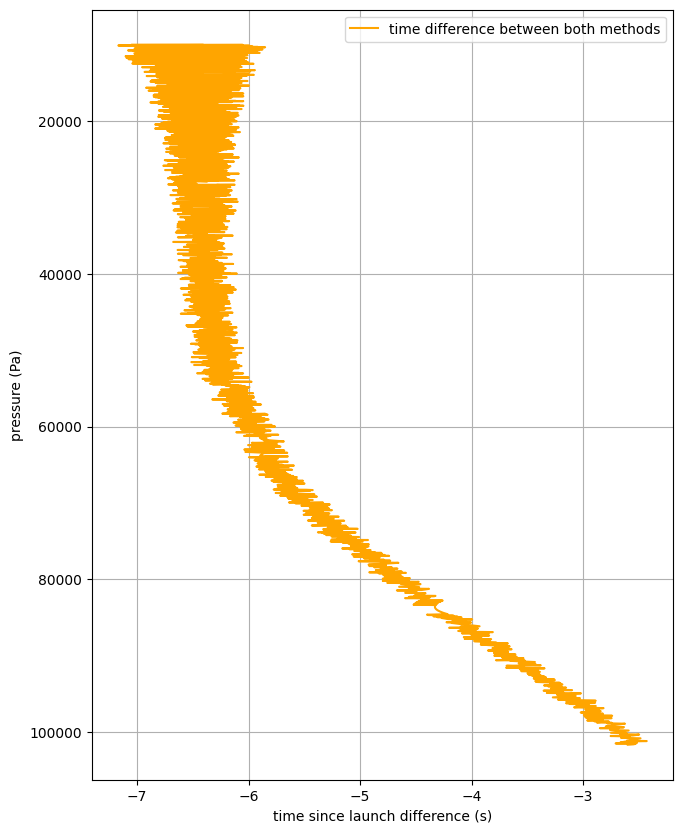

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (7.5,10))
ax.plot(np.array(df.calc_displacement_time) - np.array(trajectory_with_height_info[2]),df.pressure,color='orange', label='time difference between both methods')
# ax.plot(np.array(),df.pressure, color='red', label='calculate time (with height info)')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('pressure (Pa)')
ax.set_xlabel('time since launch difference (s)')
ax.grid()
ax.legend()